# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:                                                             1. Pre-process the dataset.                                                                                        2. Identify outliers                                                                                                       3. Check the correlation.                                                                                            4. Implement linear regression and random forest regression models.               5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data
data = pd.read_csv("uber.csv")

In [4]:
#Create a data copy
df = data.copy()

In [5]:
#Print data
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
#Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 10.7 MB


In [14]:
#pickup_datetime is not in required data format
#df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

# Correlation

In [8]:
#Correlation
df.drop('key', axis=1, inplace=True) 

In [9]:
df.drop('pickup_datetime', axis=1, inplace=True)
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000589,0.000230,-0.000341,0.000270,0.000271,0.002257
fare_amount,0.000589,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.000230,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.000341,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002257,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


# Identify outliers

<Axes: >

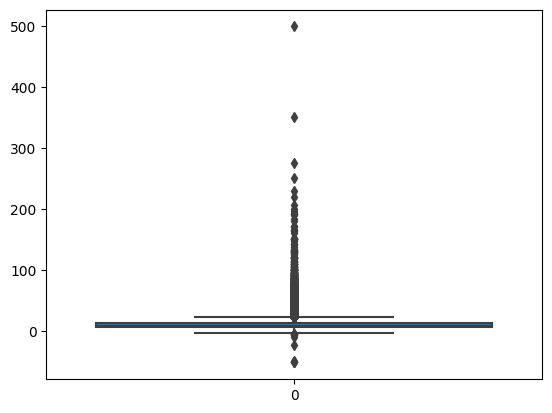

In [13]:
sns.boxplot(df['fare_amount'])

In [16]:
Q1 = np.percentile(df['fare_amount'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['fare_amount'], 75, interpolation = 'midpoint')
print(Q1,Q3)

6.0 12.5


np.percentile(data['fare_amount'], 25, interpolation = 'midpoint'): This line calculates the value at the 25th percentile of the 'fare_amount' column. The 25th percentile is known as the first quartile (Q1) and represents the value below which 25% of the data fall. The interpolation = 'midpoint' parameter indicates that if the percentile falls between two data points, the midpoint of the two points will be returned.

np.percentile(data['fare_amount'], 75, interpolation = 'midpoint'): Similarly, this line calculates the value at the 75th percentile of the 'fare_amount' column. The 75th percentile is known as the third quartile (Q3) and represents the value below which 75% of the data fall.

print(Q1, Q3): This line prints the values of Q1 and Q3.

### Outlier Treatment

In [20]:
#Remove Outliers
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

# df.drop(df[df['fare_amount'].values>=12.5].index,inplace=True) 

<Axes: >

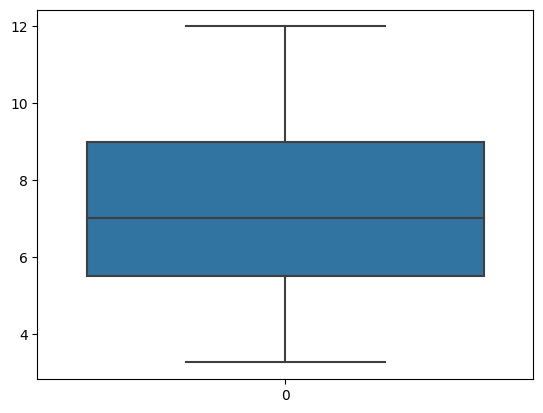

In [21]:
sns.boxplot(df['fare_amount'])

In [22]:
#Check the missing values now
df.isnull().sum()

Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

# Linear Regression

In [24]:
#Take x as predictor variable
x = df.drop("fare_amount", axis = 1)
#And y as target variable
y = df['fare_amount']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)


In [26]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [27]:
#Prediction
predict = lrmodel.predict(x_test)

In [28]:
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE error for the model is ", lrmodelrmse)

RMSE error for the model is  2.247233854099666


# Random Forest

In [40]:
#Let's Apply Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [41]:
#Fit the Forest
rfrmodel.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
rfrmodel_pred = rfrmodel.predict(x_test)

In [43]:
#Errors for the forest
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random Forest is:",rfrmodel_rmse)

RMSE value for Random Forest is: 1.4306911312797634


https://github.com/afnan47/sem7/blob/main/ML/1.%20Uber%20Price%20Detection/Uber.ipynb
    
https://github.com/Sahil-Naik/BE-Programming/blob/main/LP-III(ML)/Assignment-1/Source_Code_V2.ipynb

# NOTES: 

Sure, here's a brief explanation of Random Forest and Linear Regression, including their implementation and use:

#### 1. Random Forest:

Explanation: Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes or the mean prediction of the individual trees. It improves the accuracy and control overfitting by using multiple decision trees.

Implementation: Random Forest can be implemented using various programming languages such as Python, R, or even in some other languages using appropriate libraries. In Python, you can use the scikit-learn library, which provides an easy-to-use implementation of the Random Forest algorithm.

Use: Random Forest is commonly used for classification and regression tasks, such as predicting customer churn, stock market trends, or disease diagnosis. It is effective for handling large datasets with high dimensionality and is robust against overfitting.

#### 2. Linear Regression:

Explanation: Linear Regression is a simple and widely used statistical technique to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the dependent and independent variables.

Implementation: Linear Regression can be implemented using various programming languages such as Python, R, or MATLAB. In Python, you can use libraries like NumPy or scikit-learn to implement linear regression.

Use: Linear Regression is used for predicting numerical values, such as predicting house prices based on features like area, number of bedrooms, and location. It is also used for understanding the relationship between variables and for making forecasts. Additionally, it serves as a fundamental building block for many other machine learning algorithms. 

Both Random Forest and Linear Regression are widely used in various fields and are valuable tools in the data scientist's toolkit, each with its own strengths and suitable use cases.

# Questions and answers

Question 1: How does the number of trees in a Random Forest affect the model performance?

Answer: The number of trees in a Random Forest can impact the model performance in several ways. Increasing the number of trees generally leads to improved performance until a certain point. After this point, adding more trees may not significantly increase the model's accuracy and may result in increased computational costs. However, a smaller number of trees might lead to underfitting, causing the model to have higher bias and lower predictive power.


Question 2: What is the role of the intercept term in a linear regression model, and how does it influence the model's predictions?

Answer: The intercept term in a linear regression model represents the value of the dependent variable when all independent variables are zero. It is the point at which the regression line crosses the y-axis. The intercept helps in accounting for the baseline value or the starting point of the relationship between the independent and dependent variables. It is crucial for proper interpretation and prediction in cases where the independent variables may not naturally start at zero.

Question 3: How does the Random Forest algorithm handle missing data, and what strategies can be used to address missing values in the dataset?

Answer: Random Forest can handle missing data by utilizing a variety of techniques, including imputation and proximity-based methods. Common strategies involve imputing missing values using the mean, median, or mode of the available data, or employing sophisticated techniques such as k-nearest neighbors or mean/mode/most frequent value imputation. Alternatively, the algorithm can utilize the proximity matrix to make predictions for observations with missing values based on the similarity of other observations.

Question 4: How do you evaluate the overall performance of a Random Forest Regression model, and what are the key metrics used for model assessment?

Answer: The overall performance of a Random Forest Regression model can be evaluated using various metrics, such as mean squared error (MSE), mean absolute error (MAE), R-squared, and adjusted R-squared. These metrics help assess the model's accuracy, goodness of fit, and generalization capabilities. Additionally, examining the feature importances derived from the Random Forest can provide insights into the relative importance of different features in predicting the target variable.

Question 5: In what scenarios would you prefer using Random Forest Regression over Linear Regression, and vice versa?

Answer: Random Forest Regression is typically preferred when dealing with complex, non-linear relationships in the data, or when there is a large number of features with potentially high intercorrelation. It is also suitable for handling outliers and noisy data. On the other hand, Linear Regression is preferred when the relationship between the dependent and independent variables is expected to be linear, and when interpretability and understanding the individual impact of predictors are crucial.

Question 6 : Can you explain the concept of bagging and how it is utilized in the Random Forest algorithm to improve predictive accuracy and reduce overfitting?

Answer: Bagging (Bootstrap Aggregating) is a technique that involves training multiple models on different subsets of the training data, and then combining their predictions to generate a final prediction. In Random Forest, bagging is used to create multiple decision trees on random subsets of the data, and the final prediction is determined by aggregating the predictions from each tree. This approach helps to reduce overfitting by promoting diversity among the individual trees and improving the overall predictive accuracy of the model.

Question 7: How can you detect and handle overfitting in Random Forest and Linear Regression models, and what are the potential consequences of overfitting in each of these models?

Answer: Overfitting in Random Forest can be detected by evaluating the out-of-bag error or using cross-validation techniques, while in Linear Regression, it can be identified by examining the residuals and conducting diagnostic tests. Strategies for handling overfitting include limiting the depth of trees in Random Forest and applying regularization techniques such as Ridge and Lasso regression in Linear Regression. The consequences of overfitting include poor generalization to new data, reduced model interpretability, and increased variance, leading to unreliable predictions and potential model instability.